In [3]:
import numpy as np 
import pandas as pd
import os
import psycopg2
import geopandas as gpd

import importlib
from Secrets import secrets
# importlib.reload(secrets)

import matplotlib.pyplot as plt
import seaborn as sns

### Analysis
 
 - Crime rate over time by category
 - - Areas with most crime rate by type
 - - Crime rate by areas and over time
 
 - Best areas for grocery stores
 - Best areas for going out 
 - Best areas for school catchment
 - Corr/Relationship between areas with most coffee shops/ bars/ restaurants opening and house prices
 
 - Relationship between avg price, gdp, hpi
 - Areas that under and over perform hpi index
 
 - estimate premium paid per sqft for good schools, stores vibrant areas
 - estimate drivers for price

In [19]:
engine = psycopg2.connect(database="postgres", user=secrets.user(), password=secrets.password(), host=secrets.host(), port='5432')

sql = """
SELECT 
    c.cat_group, g.ward_name, g.ward_geometry, sum(c.value) as total_cases
from crime_by_year as c
join geo2 as g
on c.lsoa = g.lsoa
where c.year = 2019
group by c.cat_group, g.ward_name, g.ward_geometry

;

"""

gdf_all = gpd.read_postgis(sql, engine, geom_col='ward_geometry') 
gdf_all.head(2)

,cat_group,ward_name,ward_geometry,total_cases
0,Criminal Damage,Abbey,"POLYGON ((543595.500 184832.800, 543601.700 18...",133.0
1,Criminal Damage,Abbey,"POLYGON ((525122.600 170480.900, 525185.400 17...",52.0


In [39]:
gdf_all.groupby("ward_name", as_index=False)["total_cases"].sum().sort_values(by="total_cases", ascending=False).head(10)

,ward_name,total_cases
367,Southwark,38536.0
416,Tower Hamlets,33483.0
178,Hackney,33234.0
104,Croydon,32143.0
447,West End,25636.0
242,Kensington and Chelsea,24067.0
340,Redbridge,23417.0
374,St. James's,21554.0
26,Bexley,17468.0
386,Stratford and New Town,7712.0


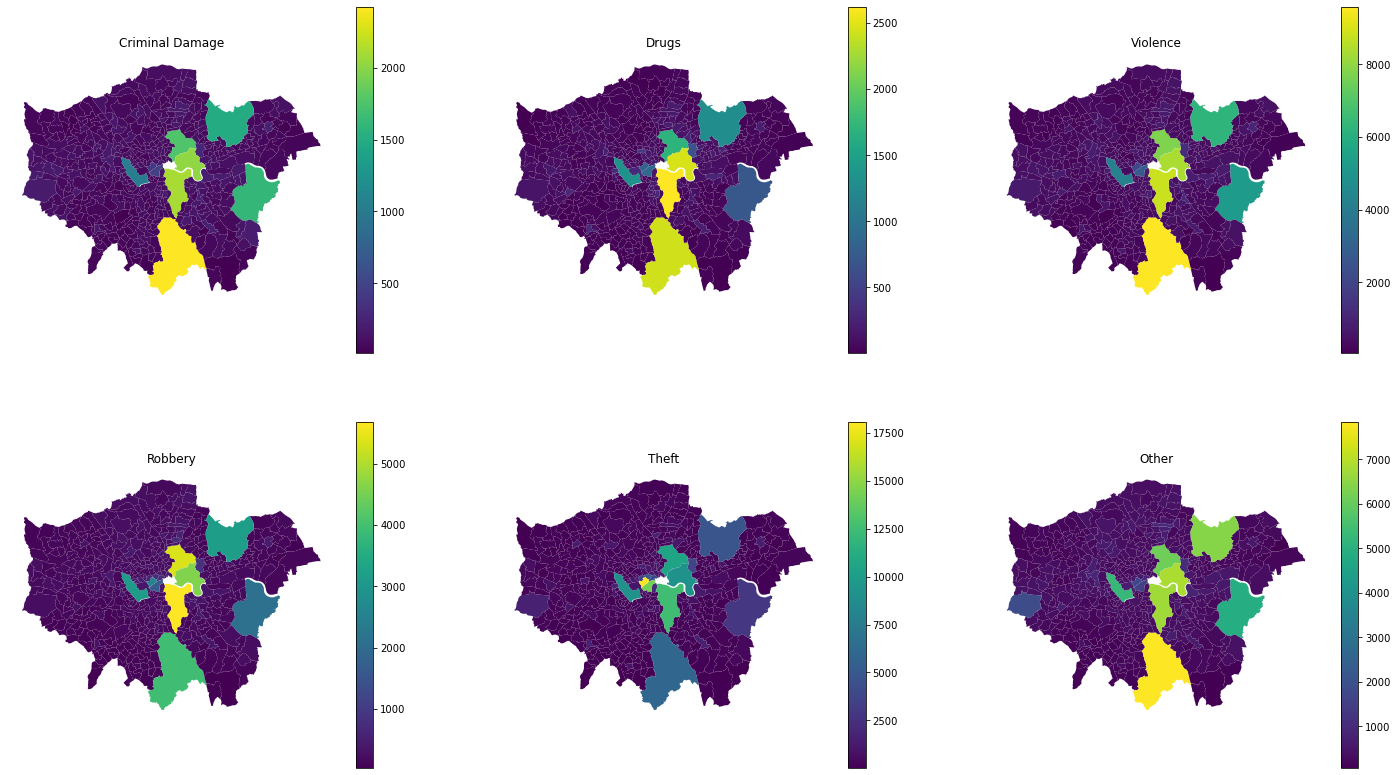

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 14))
ax = ax.flatten()

ax[0].axis('off')
gdf_all[gdf_all.cat_group == "Criminal Damage"].plot(ax = ax[0], column="total_cases", legend=True)
ax[0].set_title("Criminal Damage")

ax[1].axis('off')
gdf_all[gdf_all.cat_group == "Drugs"].plot(ax = ax[1], column="total_cases", legend=True)
ax[1].set_title("Drugs")

ax[2].axis('off')
gdf_all[gdf_all.cat_group == "Violence"].plot(ax = ax[2], column="total_cases", legend=True)
ax[2].set_title("Violence")

ax[3].axis('off')
gdf_all[gdf_all.cat_group == "Robbery"].plot(ax = ax[3], column="total_cases", legend=True)
ax[3].set_title("Robbery")


ax[4].axis('off')
gdf_all[gdf_all.cat_group == "Theft"].plot(ax = ax[4], column="total_cases", legend=True)
ax[4].set_title("Theft")


ax[5].axis('off')
gdf_all[gdf_all.cat_group == "Other"].plot(ax = ax[5], column="total_cases", legend=True)
ax[5].set_title("Other")

plt.show()

In [ ]:
engine = psycopg2.connect(database="postgres", user=secrets.user(), password=secrets.password(), host=secrets.host(), port='5432')

sql = """
SELECT 
    c.year, c.cat_group, sum(c.value) as total_cases
from crime2 as c
join geo2 as g
on c.lsoa = g.lsoa
group by c.year, c.cat_group

;

"""

gdf_all = gpd.read_postgis(sql, engine, geom_col='ward_geometry') 
gdf_all.head(2)

In [ ]:
sns.lineplot(data=gdf_all, x="year", y="total_cases", hue="cat_group")

In [ ]:
# Grocery stores

In [ ]:
engine = psycopg2.connect(database="postgres", user=secrets.user(), password=secrets.password(), host=secrets.host(), port='5432')

sql = """
SELECT 
    s.lsoa, s.cat_group, g.rg_name, g.lsoa_geometry, count(*) as total_stores
from stores as s
join geo2 as g
on c.lsoa = g.lsoa
group by s.lsoa, s.cat_group, g.rg_name, g.lsoa_geometry,
;

"""

gdf_all = gpd.read_postgis(sql, engine, geom_col='ward_geometry') 
gdf_all.head(2)

In [ ]:
# Schools

In [ ]:
engine = psycopg2.connect(database="postgres", user=secrets.user(), password=secrets.password(), host=secrets.host(), port='5432')

sql = """
SELECT 
    s.lsoa, s.cat_group, g.rg_name, g.lsoa_geometry, count(*) as total_stores
from schools as s
join geo2 as g
on c.lsoa = g.lsoa
group by s.lsoa, s.cat_group, g.rg_name, g.lsoa_geometry,
;

"""

gdf_all = gpd.read_postgis(sql, engine, geom_col='ward_geometry') 
gdf_all.head(2)

In [ ]:
# Choose comparable properties

In [ ]:
# Correlation between prices and # of coffee shops by lsoa


In [ ]:
# # Get Data from AWS RDS PostgresSQL DB (all data within the database is publicly available and been scrapped and collected by myself)

# engine = psycopg2.connect(database="postgres", user=secrets.user(), password=secrets.password(), host=secrets.host(), port='5432')
# cur = engine.cursor()

# cur.execute("""

# SELECT 
#     CAST (p.year AS INTEGER), p.new, p.duration, p.type, g.rg_name, g.geometry,
#     CAST(ROUND(AVG(p.price)::numeric,0 ) as integer) as avg_price,
#     CAST(ROUND(AVG(e.total_floor_area)::numeric,0 ) as integer) as avg_sqft,
#     CAST(ROUND(AVG(e.number_habitable_rooms)::numeric,0 ) as integer) as avg_rooms,
#     CAST(ROUND( AVG(p.price/e.total_floor_area)::numeric, 3 ) as integer) as sqft_price,
#     CAST(ROUND( AVG(p.price/e.number_habitable_rooms)::numeric, 3 ) as integer) as price_per_room

# from prices as p
# join epc as e
# on e.brn = p.brn
# join geo as g
# on p.lsoa = g.lsoa
# where e.total_floor_area <> 0 and e.number_habitable_rooms <> 0 and e.number_habitable_rooms is not null and e.total_floor_area is not null

# group by p.year, p.new, p.duration, p.type, g.rg_name, g.geometry;

# """)
# rows = cur.fetchall()
# result = pd.DataFrame(rows, columns = [desc[0] for desc in cur.description])
# result.head(2)

In [ ]:
engine = psycopg2.connect(database="postgres", user=secrets.user(), password=secrets.password(), host=secrets.host(), port='5432')

sql = """

select g.lsoa, g.lsoa_name, g.geometry, avg(p.price)
from geo as g
left join prices2 as p
on p.lsoa = g.lsoa
group by g.lsoa, g.geometry, g.lsoa_name;

"""

gdf = gpd.read_postgis(sql, engine, geom_col='geometry') 
gdf

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.axis('off')
gdf.plot(ax = ax, column="avg", \
         legend=True, \
         missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing values",},
        )

plt.show()